In [4]:
!pip install  setfit


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00


In [5]:

import pandas as pd
from setfit import SetFitModel
from sklearn.model_selection import train_test_split


In [6]:
!pip install kaggle


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
!kaggle datasets download -d parve05/customer-review-dataset
!unzip customer-review-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/parve05/customer-review-dataset
License(s): unknown
  0% 0.00/18.0k [00:00<?, ?B/s]
100% 18.0k/18.0k [00:00<00:00, 34.5MB/s]
Archive:  customer-review-dataset.zip
  inflating: redmi6.csv              


In [8]:
import pandas as pd

df = pd.read_csv('/content/redmi6.csv', encoding='latin-1')

df.head()


,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


In [9]:
#convert comments into string
df['Comments']=df['Comments'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#sentiment label based on ratings

def label_sentiment(row):
  if '5.0' in row['Rating']:
    return 'positive'

  elif '4.0' in row['Rating']:
    return 'positive'

  elif '3.0' in row['Rating']:
    return 'neutral'
  else:
    return 'negative'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
original_df = df.copy()

In [12]:
df['label'] = original_df.apply(label_sentiment, axis=1)

In [13]:
!pip install matplotlib seaborn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-b2662bcd8029>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


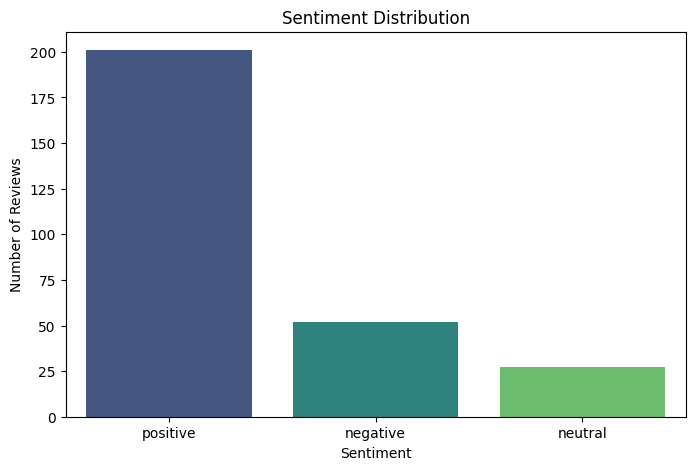

In [15]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [16]:
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#visualize common words in comments
text=' '.join(df['Comments'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

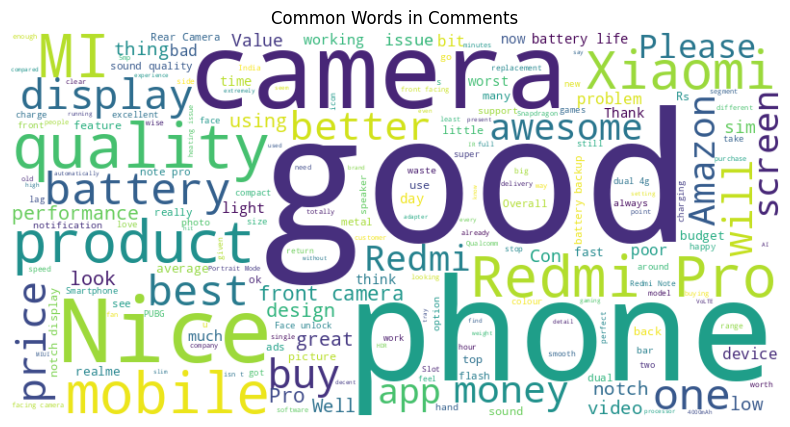

In [18]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Comments')
plt.show()

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
positive_comments=df[df['label']=='positive']['Comments']
negative_comments=df[df['label']=='negative']['Comments']
neutral_comments=df[df['label']=='neutral']['Comments']

In [21]:
def get_unique_words(comments):
  text=' '.join(comments)
  # Split the text into words and filter out stop words
  words=set(word for word in text.split() if word.lower() not in stop_words)
  return ' '.join(words)

In [22]:
positive_words=get_unique_words(positive_comments)
negative_words=get_unique_words(negative_comments)
neutral_words=get_unique_words(neutral_comments)

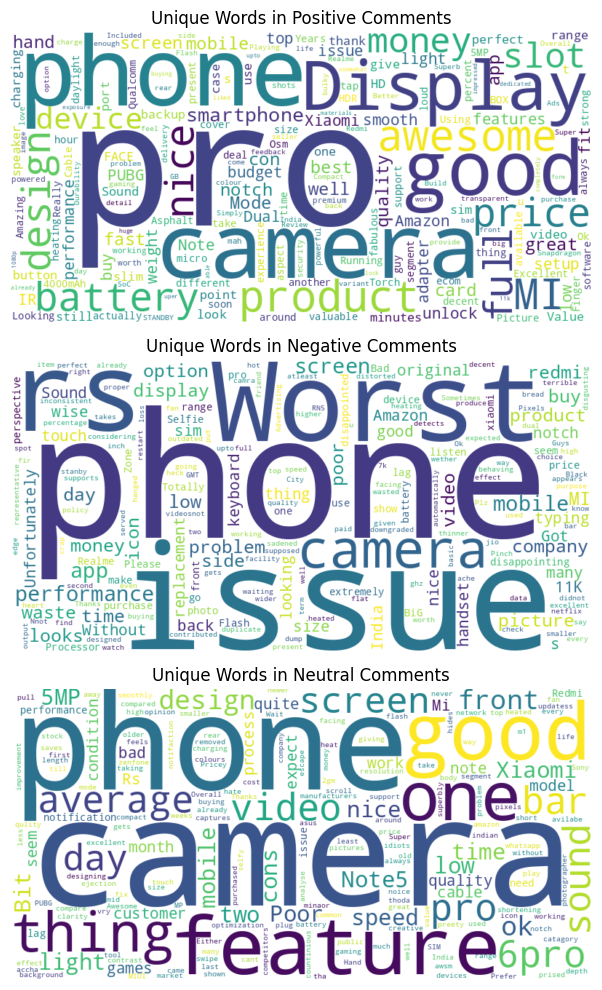

In [23]:
positive_wordcloud=WordCloud(width=800,height=400,background_color='white').generate(positive_words)
negative_wordcloud=WordCloud(width=800,height=400,background_color='white').generate(negative_words)
neutral_wordcloud=WordCloud(width=800,height=400,background_color='white').generate(neutral_words)

plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.imshow(positive_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Unique Words in Positive Comments')

plt.subplot(3,1,2)
plt.imshow(negative_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Unique Words in Negative Comments')

plt.subplot(3,1,3)
plt.imshow(neutral_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Unique Words in Neutral Comments')

plt.tight_layout()
plt.show()

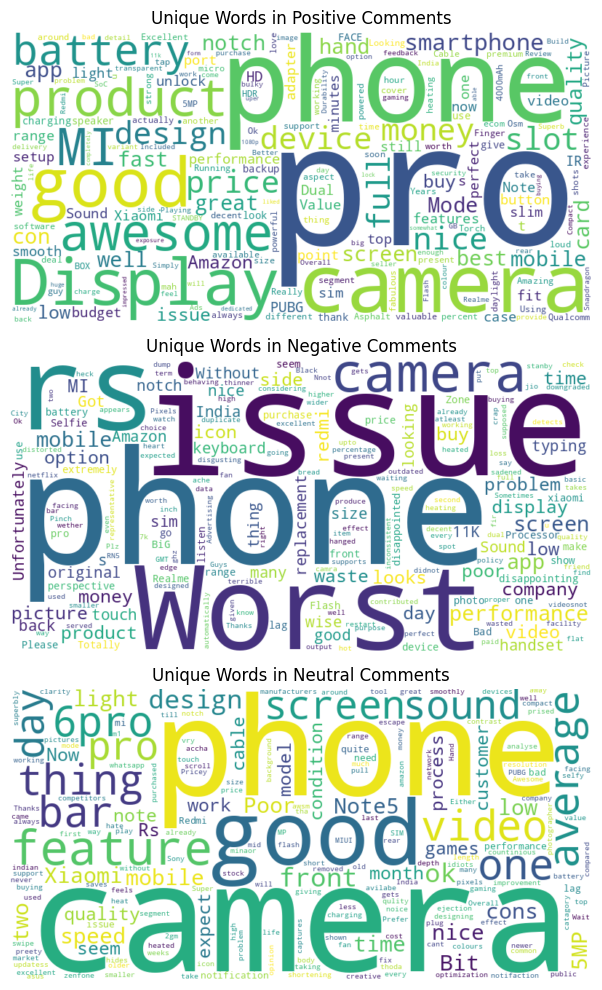

In [24]:
positive_comments = df[df['label'] == 'positive']['Comments']
negative_comments = df[df['label'] == 'negative']['Comments']
neutral_comments = df[df['label'] == 'neutral']['Comments']

# Function to get unique words from comments
def get_unique_words(comments):
    text = ' '.join(comments)
    words = set(text.split())
    return ' '.join(words)

positive_unique_words = get_unique_words(positive_comments)
negative_unique_words = get_unique_words(negative_comments)
neutral_unique_words = get_unique_words(neutral_comments)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_unique_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_unique_words)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_unique_words)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Unique Words in Positive Comments')

plt.subplot(3, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Unique Words in Negative Comments')

plt.subplot(3, 1, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Unique Words in Neutral Comments')

plt.tight_layout()
plt.show()


In [25]:
#print df columns
print(df.columns)

Index(['Review Title', 'Customer name', 'Rating', 'Date', 'Category',
       'Comments', 'Useful', 'label'],
      dtype='object')


In [26]:
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,label
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,positive
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,neutral
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,neutral
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,positive
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,negative


In [27]:
!pip install sentence-transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
embeddings=model.encode(df['Comments'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

In [30]:
embeddings = np.array(embeddings)

In [31]:
#combine embeddings with labels into a df
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['label'] = df['label'].values

In [32]:
from sklearn.model_selection import train_test_split

#split dataset
X_train, X_test, y_train, y_test = train_test_split(
    embeddings_df.drop(columns='label'),
    embeddings_df['label'],
    test_size = 0.2,
    random_state = 42,
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
from setfit import SetFitModel
from setfit import Trainer
from datasets import Dataset
import pandas as pd

train_df = pd.DataFrame({
    'text': df['Comments'],  # Original comments as text
    'label': df['label']     # Sentiment labels
})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
train_dataset = Dataset.from_pandas(train_df)


In [35]:
from setfit import Trainer, TrainingArguments

In [36]:
model = SetFitModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [37]:
training_args = TrainingArguments(
    output_dir='./logs',         # Directory for logs
    batch_size=16,               # Set batch size
    num_epochs=3,                # Specify number of epochs
)

In [38]:
trainer = Trainer(
    model = model,
    train_dataset = train_dataset,
    args = training_args  )

Map:   0%|          | 0/280 [00:00<?, ? examples/s]

In [39]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
***** Running training *****
  Num unique pairs = 44114
  Batch size = 16
  Num epochs = 3


Step,Training Loss
1,0.350700
50,0.313800
100,0.297900
150,0.260600
200,0.217100
250,0.168800
300,0.126200
350,0.097600
400,0.073800
450,0.070800


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

In [40]:
# Convert to a 2D numpy array and then flatten to 1D if needed
test_embeddings = X_test.values.flatten()  # Flatten if necessary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
test_df = pd.DataFrame({
    'text': ['Placeholder text'] * len(y_test),
    'label': y_test
})


In [42]:
predictions = model.predict(test_df['text'].tolist())

In [44]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_df['label'], predictions)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(test_df['label'], predictions))


Accuracy: 0.79
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         9
     neutral       0.00      0.00      0.00         3
    positive       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.26      0.33      0.29        56
weighted avg       0.62      0.79      0.69        56



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
model.save_pretrained("./fine_tuned_model")